In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('heart.csv')

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
raw_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot: xlabel='age', ylabel='Density'>

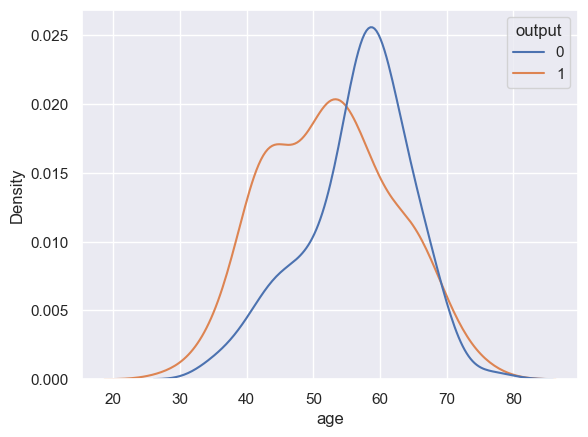

In [4]:
sns.kdeplot(x=raw_data.age,hue=raw_data.output)


AS expected younger people are at less risk at developoing heart failure

<AxesSubplot: xlabel='sex', ylabel='output'>

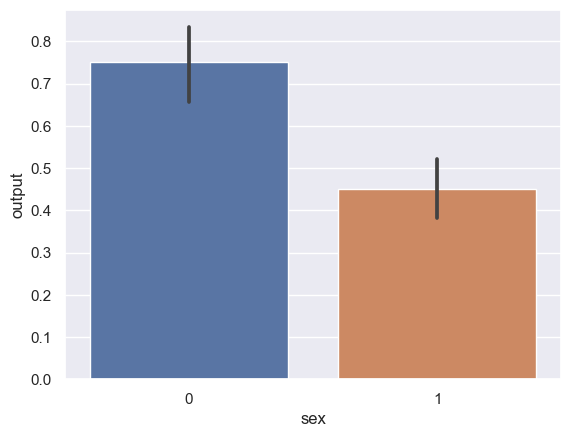

In [5]:
sns.barplot(x=raw_data.sex,y=raw_data.output)


SEX 0 (females?) are more likely to develop heart failures

<AxesSubplot: xlabel='cp', ylabel='output'>

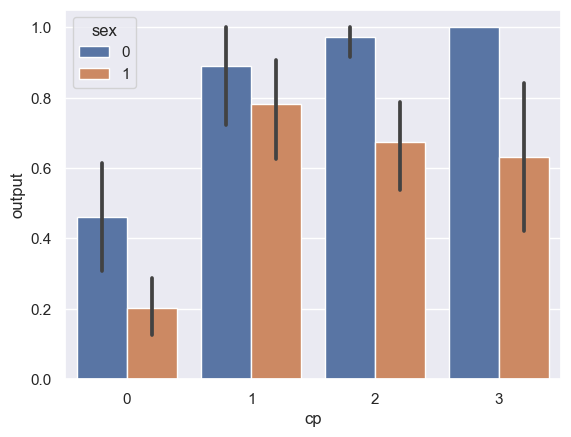

In [6]:
# sns.kdeplot(x=raw_data.cp,hue=raw_data.output)
sns.barplot(x=raw_data.cp,y=raw_data.output,hue=raw_data.sex) 
    

 more likely to develop heart failures as cp increases heartfailure chances increase

<AxesSubplot: xlabel='trtbps', ylabel='Density'>

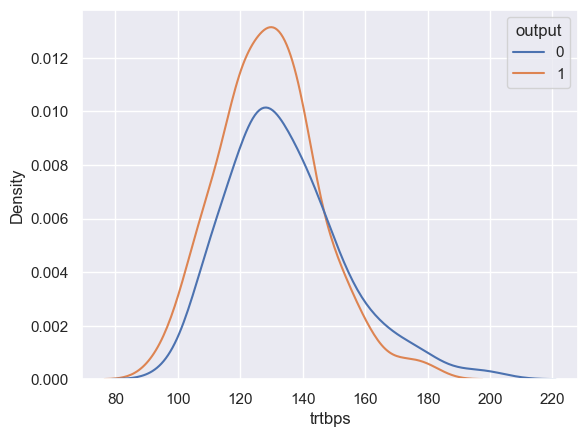

In [7]:
sns.kdeplot(x=raw_data.trtbps,hue=raw_data.output)


Similar distribution of trtbps 

<AxesSubplot: xlabel='chol', ylabel='Density'>

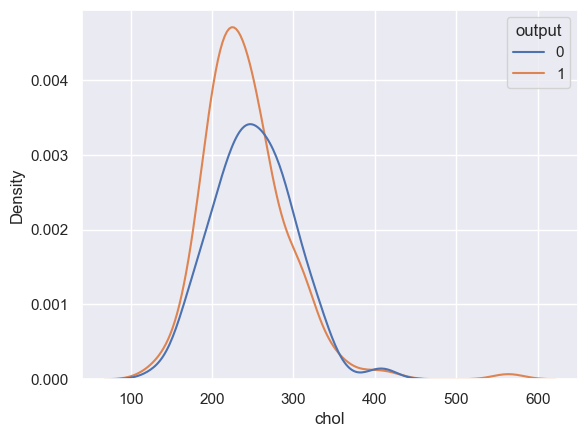

In [8]:
##As expected lower cholesterol contributes to higher chances of heart failure
sns.kdeplot(x=raw_data.chol,hue=raw_data.output)


0    258
1     45
Name: fbs, dtype: int64

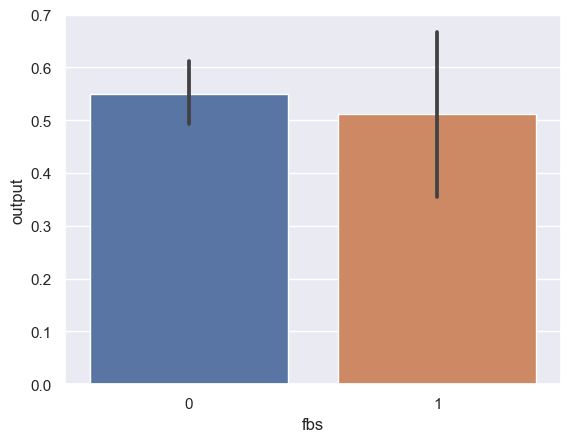

In [9]:
sns.barplot(x=raw_data.fbs,y=raw_data.output)
raw_data.fbs.value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

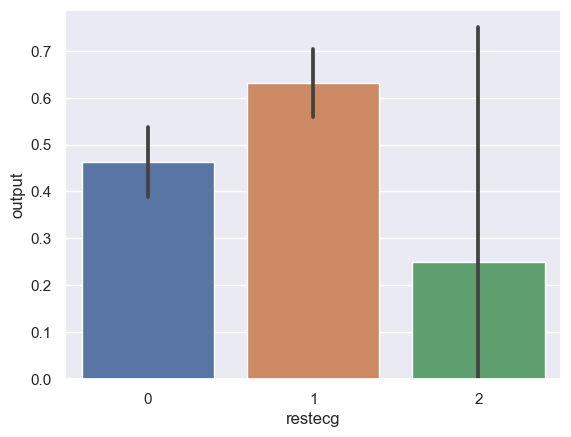

In [10]:
sns.barplot(x=raw_data.restecg,y=raw_data.output)
raw_data.restecg.value_counts()

<AxesSubplot: xlabel='thalachh'>

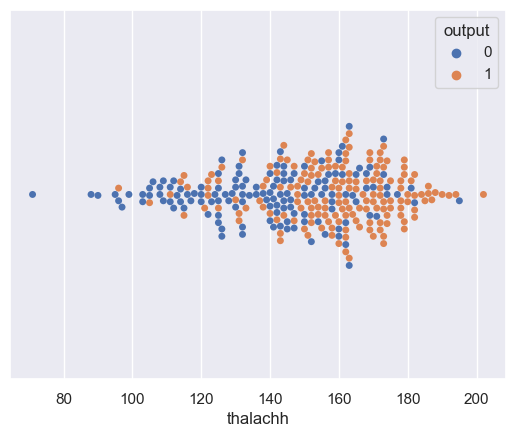

In [11]:
##As thalachh (maximum heart rate achieved) increases, higher chance of developing a heart attack.
sns.swarmplot(x=raw_data.thalachh , hue=raw_data.output)

<AxesSubplot: xlabel='exng', ylabel='count'>

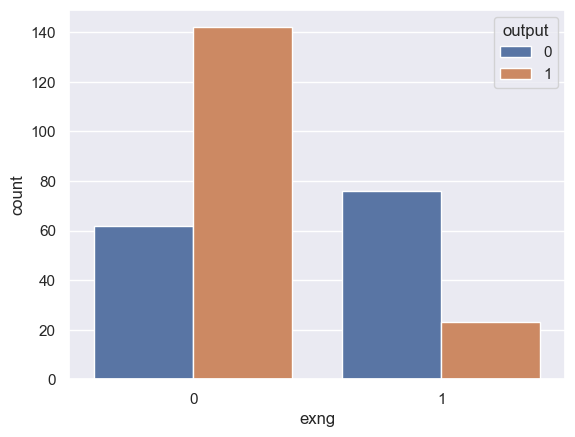

In [13]:
##Very clear that exercise induced angina doesnt contribute as much to a heart attack
sns.countplot(raw_data,x='exng',hue='output')

<AxesSubplot: xlabel='oldpeak'>

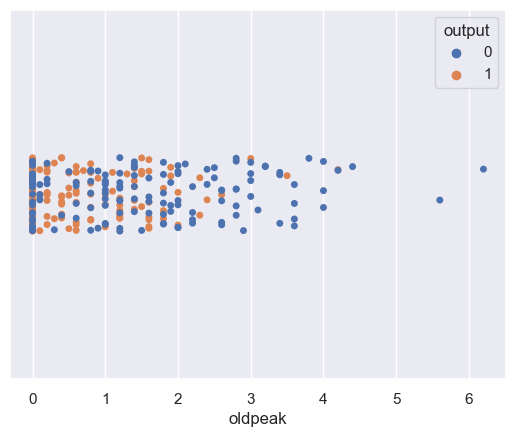

In [14]:
#oldpeak ^^, higher chance of heartattack
sns.stripplot(x=raw_data.oldpeak , hue=raw_data.output)

<AxesSubplot: xlabel='slp', ylabel='count'>

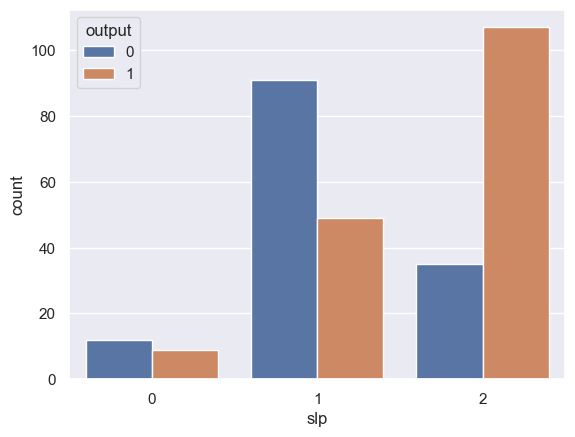

In [15]:
## As SLope INCrease , HIGHER likelihood of heart attack
sns.countplot(raw_data,x='slp',hue='output')

<AxesSubplot: xlabel='caa', ylabel='count'>

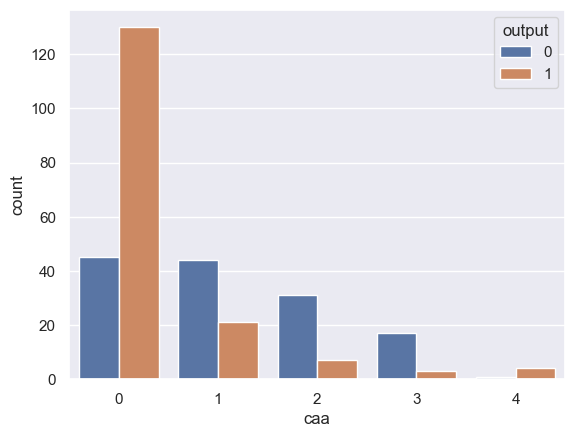

In [16]:
#lack  of major vessels is one of the main causes of  developing a heart attack
sns.countplot(raw_data,x='caa',hue='output')


2    166
3    117
1     18
0      2
Name: thall, dtype: int64

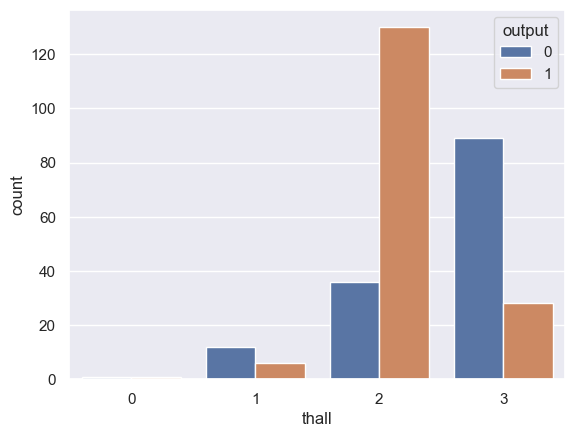

In [17]:
#thall rate of  2 has a much higher chance of developing a heart attack
sns.countplot(raw_data,x='thall',hue='output')
raw_data.thall.value_counts()

## Originally I clipped some outliers but noticed that it massively reduced the accuracy so will end up keeping the outliers for now

In [98]:
# from scipy import stats
# def clip_outliers(df, column, mode='zscore', threshold=3):
#     data = df[column]
#     if mode == 'zscore':
#         z = np.abs(stats.zscore(data))
#         df[column] = np.where(z > threshold, np.sign(data)*threshold, data)
#     elif mode == 'iqr':
#         q1 = data.quantile(0.25)
#         q3 = data.quantile(0.75)
#         iqr = q3 - q1
#         lower = q1 - threshold*iqr
#         upper = q3 + threshold*iqr
#         df[column] = np.where(data < lower, lower, np.where(data > upper, upper, data))
#     elif mode == 'quantile':
#         lower = data.quantile(threshold)
#         upper = data.quantile(1-threshold)
#         df[column] = np.where(data < lower, lower, np.where(data > upper, upper, data))
#     else:
#         print("Invalid mode. Please choose either 'zscore', 'iqr', or 'quantile'.")

## Dealing with outliers, we will clip them as to not remove any valuable data

In [99]:
# data_no_outliers = raw_data.copy()
# clip_outliers(data_no_outliers,'age')
# clip_outliers(data_no_outliers,'thalachh')
# clip_outliers(data_no_outliers,'oldpeak')
# clip_outliers(data_no_outliers,'chol')
# clip_outliers(data_no_outliers,'trtbps')


<AxesSubplot: ylabel='Frequency'>

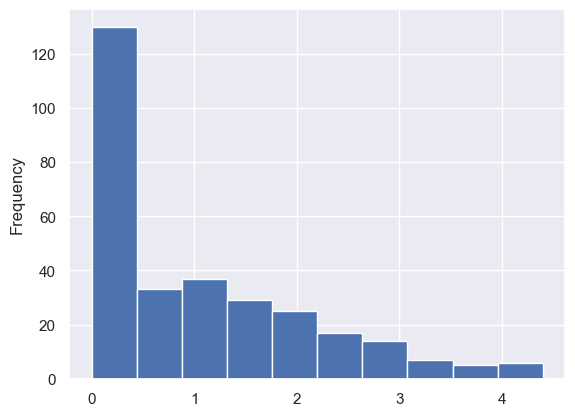

In [ ]:
# data_no_outliers.oldpeak.plot.hist()

In [200]:
#Experimented with dummy categories but wasn't needed
# dummies = pd.get_dummies(inputs,columns=['sex','cp','fbs','restecg','slp','caa','thall'],drop_first=True)
# from sklearn.model_selection import train_test_split
# x_train_dummies , x_test_dummies , y_train_dummies , y_test_dummies = train_test_split(dummies,target,test_size=0.2,random_state=1)

# Split our dataset to inputs and targets

In [19]:
inputs = raw_data.drop('output',axis=1)
target= raw_data['output']

In [34]:
##Split into train test dataset for testing
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(inputs,target,test_size=0.2)

In [35]:
## Normalize our train_data then transform our test_data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# scaler_dummies = StandardScaler()
# x_dummies_scaled = scaler.fit_transform(x_train_dummies)
# x_test_dummies_scaled = scaler.transform(x_test_dummies)



## Import the models that we will use and define a function to evaluate our models

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay , f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

def evaluate_model(x_train, x_test, y_train, y_test, model):
    # fit the model to the training data
    model.fit(x_train, y_train)
    
    # make predictions on the test data
    y_pred = model.predict(x_test)
    
    # calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # # plot confusion matrix
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    # disp.plot()
    f1 = f1_score(y_test,y_pred)
    # return accuracy and confusion matrix
    return accuracy, cm , f1


In [39]:
##Loop over our models and print the accuracy , fscore and their respective Confusion Matrices
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
    SVC()
]

# iterate through the list of models and evaluate each one
for model in models:
    accuracy, cm,f1 = evaluate_model(x_train_scaled, x_test_scaled, y_train, y_test,model)
    print(model.__class__.__name__)
    print("Accuracy:", accuracy,"F1_Score:", f1)
    print("Confusion Matrix:\n", cm)
    print("="*100)

LogisticRegression
Accuracy: 0.8524590163934426 F1_Score: 0.88
Confusion Matrix:
 [[19  7]
 [ 2 33]]
RandomForestClassifier
Accuracy: 0.8524590163934426 F1_Score: 0.8732394366197184
Confusion Matrix:
 [[21  5]
 [ 4 31]]
GaussianNB
Accuracy: 0.819672131147541 F1_Score: 0.8493150684931505
Confusion Matrix:
 [[19  7]
 [ 4 31]]
KNeighborsClassifier
Accuracy: 0.8524590163934426 F1_Score: 0.88
Confusion Matrix:
 [[19  7]
 [ 2 33]]
SVC
Accuracy: 0.9016393442622951 F1_Score: 0.9189189189189189
Confusion Matrix:
 [[21  5]
 [ 1 34]]


C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Experiment with Voting classifiers  *soft and hard

In [41]:

from sklearn.ensemble import VotingClassifier
# create a list of models to include in the ensemble
models = [
    ('log_reg', LogisticRegression()),
    ('knn', KNeighborsClassifier())
]

# create the ensemble model with soft voting
soft_voting_model = VotingClassifier(estimators=models, voting='soft')

# fit the model to the training data and make predictions on the test data
soft_voting_model.fit(x_train_scaled, y_train)
y_pred_soft = soft_voting_model.predict(x_test_scaled)

# calculate accuracy score
accuracy_soft = accuracy_score(y_test, y_pred_soft)

# print the accuracy score
print("Soft Voting Accuracy:", accuracy_soft)

Soft Voting Accuracy: 0.8524590163934426


In [42]:
from sklearn.tree import DecisionTreeClassifier
# create a list of models to include in the ensemble
models = [
    ('log_reg', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('knn', KNeighborsClassifier())
]

# create the ensemble model with hard voting
hard_voting_model = VotingClassifier(estimators=models, voting='hard')

# fit the model to the training data and make predictions on the test data
hard_voting_model.fit(x_train_scaled, y_train)
y_pred_hard = hard_voting_model.predict(x_test_scaled)

# calculate accuracy score
accuracy_hard = accuracy_score(y_test, y_pred_hard)

# print the accuracy score
print("Hard Voting Accuracy:", accuracy_hard)

Hard Voting Accuracy: 0.8524590163934426


C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Experiment with gridsearch to find best parameters

In [43]:
from sklearn.model_selection import GridSearchCV

parameters=[]
# Define a dictionary of hyperparameters to search over for each algorithm
# You can modify this dictionary to include different hyperparameters and values
# to search over for each algorithm
param_grids = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10]},
    'Naive Bayes': {},
    'K-Nearest Neighbors': {'n_neighbors': np.arange(1,12)},
    'Support Vector Machine': {'C': [0.1,0.5, 1,5, 10], 'gamma': ['auto', 'scale'], 'kernel':['linear','poly','rbf','sigmoid']}
}

# Train and test multiple classification models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

for name, model in models.items():
    # Define the grid search using the hyperparameters in param_grids
    grid_search = GridSearchCV(model, param_grids[name], cv=5, n_jobs=-1)
    
    # Fit the grid search to the training data
    grid_search.fit(x_train_scaled, y_train)
    
    # Print the best hyperparameters found by the grid search
    print(f"Best hyperparameters for {name}: {grid_search.best_params_}")
    parameters.append(grid_search.best_params_)

Best hyperparameters for Logistic Regression: {'C': 0.01}
Best hyperparameters for Naive Bayes: {}
Best hyperparameters for K-Nearest Neighbors: {'n_neighbors': 4}
Best hyperparameters for Support Vector Machine: {'C': 0.5, 'gamma': 'auto', 'kernel': 'sigmoid'}


[{'C': 0.1},
 {},
 {'n_neighbors': 5},
 {'C': 0.5, 'gamma': 'auto', 'kernel': 'sigmoid'}]

In [44]:
def evaluate_cv_model(x_train, x_test, y_train, y_test, model,parameters):
    # fit the model to the training data
    model.set_params(**parameters)
    model.fit(x_train, y_train)
    
    # make predictions on the test data
    y_pred = model.predict(x_test)
    
    # calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # # plot confusion matrix
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    # disp.plot()
    f1 = f1_score(y_test,y_pred)
    # return accuracy and confusion matrix
    return accuracy, cm , f1


In [45]:
models_cv = [
    LogisticRegression(),
    GaussianNB(),
    KNeighborsClassifier(7),
    SVC()
]

# iterate through the list of models and evaluate each one
for i,model in enumerate(models_cv):
    accuracy, cm,f1 = evaluate_cv_model(x_train_scaled, x_test_scaled, y_train, y_test,model,parameters[i])
    print(model.__class__.__name__)
    print("Accuracy:", accuracy,"F1_Score:", f1)
    print("Confusion Matrix:\n", cm)
    print("="*80)

LogisticRegression
Accuracy: 0.8524590163934426 F1_Score: 0.8831168831168832
Confusion Matrix:
 [[18  8]
 [ 1 34]]
GaussianNB
Accuracy: 0.819672131147541 F1_Score: 0.8493150684931505
Confusion Matrix:
 [[19  7]
 [ 4 31]]
KNeighborsClassifier
Accuracy: 0.7868852459016393 F1_Score: 0.8059701492537314
Confusion Matrix:
 [[21  5]
 [ 8 27]]
SVC
Accuracy: 0.8524590163934426 F1_Score: 0.8831168831168832
Confusion Matrix:
 [[18  8]
 [ 1 34]]


C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
